# Searching and sorting

You will learn how to write **pseudo code** and a bit about **computational complexity** (big-O notion). You will learn about **functional recursion** and some illustrative **search** (sequential, binary) and **sort** (bubble, insertion, quick) algorithms.

**Note:** I will be live-coding a lot today. Have your computer ready to code along with me.

**Link:**

1. [Problem Solving with Algorithms and Data Structures using Python](http://interactivepython.org/runestone/static/pythonds/index.html) [illustrations below are taken from here]
2. [How expensive is an operation on a CPU?](https://streamhpc.com/blog/2012-07-16/how-expensive-is-an-operation-on-a-cpu/)

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/lectures-2019/master?urlpath=lab/tree/08/Searching_and_sorting.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import time

# Algorithms

**Technically:** An unambigious specification of how to solve a class of problems.

**In a nut shell:** A cooking recipe.

    1. Preheat the oven
    2. Mix flour, sugar and eggs
    3. Pour into a baking pan
    etc.
    
**Properties of an algorithm:**

1. Unambigious termination criteria
1. Pre-defined inputs
2. Pre-defined ouputs
3. Guaranteed finite runtime
4. Correct results

## Simple example

**Problem:** Given a list of positive numbers, return the largest number in the list.

**Inputs:** A list `L` of positive numbers.

**Outputs:** A number.

**Algorithm:** `find_max()`
    
  1. Set `max` to 0.
  2. For each `x` in the list `L`, compare it to `max`. If `x` is larger, set `max` to `x`.
  3. `max` is now set to the largest number in the list.
  
> **Note:** The above is called **pseudo-code** (understandable across programming languages).

Implementation in Python:

In [2]:
def find_max(L):
    max = 0
    for x in L:
        if x > max:
            max = x
    return max

**Question:** Why should `L` only contain positive numbers?

## Algorithmic complexity

The `find_max()` algorithm has `n = len(L)` operations each making a *comparison* (`x > max`) and (perhaps) an *assignment* (`max = x`).

The number of operations increase linearily in the length of the input list (the order of the function is linear)

**Mathematically** we say that `find_max()` has linear complexity, \\(O(n)\\) where zn$ is the input size.

Other **common levels of complexity** are:

1. Constant, $O(1)$
2. Logarithmic, $O(\log n)$
3. Linear, $O(n)$
4. Log-linear, $O(n \log n)$
5. Quadratic, $O(n^2)$
6. Cubic, $O(n^3)$
7. Exponential, $O(2^n)$ (**curse of dimensionality**)

![bigO](bigO.png)

If the performance of an algorithm **depends on the exact values of the input** we differentiate between

1. **Best** case
2. **Average** case (across all possible inputs)
3. **Worst** case

## Example of a complexity calculation

In [3]:
def my_algorithm(n):
    
    # a. 3 assignments
    a = 5
    b = 6
    c = 10
    
    # b. 3*n^2 multiplications and assignments
    for i in range(n):
        for j in range(n):
            x = i * i
            y = j * j
            z = i * j
            
    # c. n multiplications, additions, and assignments
    #    + n multiplications and assignments
    for k in range(n):
        w = a*k + 45
        v = b*b
        
    # d. 1 assignment
    d = 33

The **total number of operations** are:  $T(n) = 3 + 3n^2 + 3n + 3n + 1 = 3n^2 + 6n + 4$

**Note**: Complexity is an *asymptotic* measure,

1. Only the number of operations matter (not their type or cost)
2. Only the highest order matter

**BigO-notation**: `my_algorithm()` is $O(n^2)$, i.e. *quadratic complexity*

**In practice:** 

1. The cost of each operation matter for fixed input size.
2. The amount and flow of memory matter for speed (cache vs. RAM vs. disc). 

[How expensive is an operation on a CPU?](https://streamhpc.com/blog/2012-07-16/how-expensive-is-an-operation-on-a-cpu/)

**Question:** What is the complexity of these two algoritms?


In [4]:
def algorithm_a(n):
    s = 0
    for i in range(n):
        for j in range(n):
            for k in range(n):
                s += 1

def algorithm_b(n):
    s = 0
    for i in range(n):
        s *= 2
    for j in range(n):
        s *= 2
    for k in range(n):
        s *= 2

# Seaching

## Linear search (also called sequential serach)

**Problem:** Check whether element is in list.

**Inputs:** A list `L` and a potential element `x`.
    
**Outputs:** Boolean.

**Algorithm:** `linear_search()`

  1. Set `found` to `False`
  2. For each `y` in the list `L`, compare it to `x`. If `x == y` set `found = True` and break loop.
  3. `found` now shows whether the element is in the list or not

In [5]:
L = [1, 2, 32, 8, 17, 19, 42, 13, 0] # test list

def linear_search(L,x):
    pass
    
print('found  3:',linear_search(L,3))
print('found 13:',linear_search(L,13))

found  3: None
found 13: None


In [6]:
def linear_search(L,x):
    """ linear search
    
    Args:
    
        L (list): List to search in.
        x (any): Element to search for.
        
    Returns:
    
        found (bool): Boolean for whether element is in list or not.
    
    """
    
    # a. prep
    i = 0
    N = len(L)
    found = False

    # b. main
    while i < N and not found:
        if L[i] == x: # comparison
            found = True
        else:
            i += 1 # increment

    # c. return
    return found

In [7]:
print('found  3:',linear_search(L,3))
print('found 13:',linear_search(L,13))

found  3: False
found 13: True


**Terminology:** The linear search algorithm is called a **brute force** algorithm (we solve the problem without any intermediate steps).

**Analysis:** Each operation consists of a *comparision* and an *incremenet*:

1. **Best case:** $1$ (element present and first in list)
2. **Average case:** 
  * $\frac{n}{2}$ (if element present), or 
  * $n$ (if element *not* present) 
3. **Worst case:** $n$ (element not present or last in list)

## Binary search

**Problem:** Check whether element is in a *sorted* list.

**Inputs:** A list `L` and a potential element `x`.
    
**Outputs:** Boolean.

**Algorithm:** `binary_search()`

  1. Set `found` to `False`, 
  2. Check whether the middle element is the one we are searching for:
    * If yes, set `found=True` and go to step 3.
    * If no, and the middle element is *smaller*, restrict attention to the *left* part of the list and restart step 2 if not empty.
    * If no, and the middle element is *larger*, restrict attention to the *right* part of the list and restart step 2 if not empty.
  3. `found` now shows whether the element is in the list or not

**Middle element:** Define the midpoint between index `i` and index `j >= i` as `i + (j-i)/2` (rounded down if necessary).

In [8]:
for i in [1,2,4]:
    for j in [4,5,6]:
        print(f'(i,j) = {i,j} -> midpoint = {i+(j-i)//2}')

(i,j) = (1, 4) -> midpoint = 2
(i,j) = (1, 5) -> midpoint = 3
(i,j) = (1, 6) -> midpoint = 3
(i,j) = (2, 4) -> midpoint = 3
(i,j) = (2, 5) -> midpoint = 3
(i,j) = (2, 6) -> midpoint = 4
(i,j) = (4, 4) -> midpoint = 4
(i,j) = (4, 5) -> midpoint = 4
(i,j) = (4, 6) -> midpoint = 5


In [9]:
L = [0, 1, 2, 8, 13, 17, 19, 32, 42] # test list

def binary_search(L,x):    
    pass

print('found  3:',binary_search(L,3))
print('found 13:',binary_search(L,13))

found  3: None
found 13: None


In [10]:
def binary_search(L,x,do_print=False):
    """ binary search
    
    Args:
    
        L (list): List to search in.
        x (any): Element to search for.
        do_print (bool): Indicator for printing progress.
        
    Returns:
    
        found (bool): Boolean for whether element is in list or not.
    
    """
    
    # a. initialize
    found = False
    
    # b. start with whole list
    first = 0
    last = len(L)-1
    
    # c. main
    while first <= last and not found:

        # i. find midpoint
        midpoint = first + (last - first) // 2 # // is integer division
    
        if do_print:
            print(L[first:last+1],L[midpoint])
            
        # ii. check if x found or smaller or larger than midpoint
        if L[midpoint] == x:
            found = True
        else:
            if x < L[midpoint]:
                last = midpoint-1
            else:
                first = midpoint+1
    
    return found

In [11]:
print('found  3:',binary_search(L,3))
print('found 13:',binary_search(L,13))

found  3: False
found 13: True


In [12]:
binary_search(L,32,do_print=True)

[0, 1, 2, 8, 13, 17, 19, 32, 42] 13
[17, 19, 32, 42] 19
[32, 42] 32


True

**Terminology:** This is called a **divide-and-conquer** algorithm.

**Analysis:**

* After 1 comparison there is approximately $\frac{n}{2}$ elements left.
* After 2 comparisons there is approximately $\frac{n}{4}$ elements left.
* After 3 comparisons there is approximately $\frac{n}{8}$ elements left.
* ...
* After $j$ comparisons there is approximately $\frac{n}{2^j}$ number of elements left.

**When is there one element left?**  $\frac{n}{2^j} = 1 \Leftrightarrow j = \frac{\log n}{\log 2}$

**Result:** The binary search algorithm is $O(\log n)$, i.e. logarithmic complexity.

# Recursion

**Problem:** Sum the elements in a list.

In [13]:
L = [1,3,5,7,9]

**Simple:** Just sum them:

In [14]:
def listsum(L):
    result = 0
    for x in L:
        result += x
    return result

print(listsum(L))

25


**Recursion:** The sum of a list is the sum of the first element and the sum of the rest of the list:

In [15]:
def listsum_recursive(L):
    if len(L) == 1:
        return L[0]
    else:
        return L[0] + listsum_recursive(L[1:])

print(listsum(L))

25


This is also a divide-and-conquor strategy. Avoids loops.

## Fibonacci numbers

**Definition:**

$$F_0 = 0$$
$$F_1 = 1$$
$$F_n = F_{n-1} + F_{n-2}$$

**Implementation:**

In [16]:
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    return fibonacci(n-1)+fibonacci(n-2)

for n in range(10):
    print(fibonacci(n))

0
1
1
2
3
5
8
13
21
34


**Test approximate formula:**

In [17]:
def fibonacci_approx(n):
    return 1/np.sqrt(5)*( ((1+np.sqrt(5))/2)**n - ((1-np.sqrt(5))/2)**n)

for n in [5,10,15,20,25]:
    print(f'n = {n:3d}: true = {fibonacci(n):6d}, approximate = {fibonacci_approx(n):20.12f}')

n =   5: true =      5, approximate =       5.000000000000
n =  10: true =     55, approximate =      55.000000000000
n =  15: true =    610, approximate =     610.000000000000
n =  20: true =   6765, approximate =    6765.000000000005
n =  25: true =  75025, approximate =   75025.000000000058


## Binary search with recursion

In [18]:
L = [0, 1, 2, 8, 13, 17, 19, 32, 42,] # test list

def binary_search_recursive(L,x):
    pass

print('found  3:',binary_search_recursive(L,3))
print('found 13:',binary_search_recursive(L,13))

found  3: None
found 13: None


In [19]:
def binary_search_recursive(L,x):
    """ recursive binary search
    
    Args:
    
        L (list): List to search in.
        x (any): Element to search for.
        
    Returns:
    
        found (bool): Boolean for whether element is in list or not.
    
    """
    
    if len(L) == 0: 
        return False # not found
    else:
        
        # a. find midpoint
        midpoint = len(L)//2
        
        # b. check if x found or smaller or larger than midpoint
        if L[midpoint] == x: # found
            return True
        else:
            if x < L[midpoint]:
                newL = L[:midpoint]
            else:
                newL = L[midpoint+1:]
            return binary_search_recursive(newL,x)

In [20]:
print('found  3:',binary_search_recursive(L,3))
print('found 13:',binary_search_recursive(L,13))

found  3: False
found 13: True


# Sorting

Function for **swapping** element `L[i]` with element `L[j]` in-place:

In [21]:
def swap(L,i,j):
    temp = L[i] # save value at i
    L[i] = L[j] # overwrite value at i with value at j
    L[j] = temp # write original value at i to value at j

**Example:**

In [22]:
L = [1, 3, 4, 9, 13] 
i = 1
j = 2
swap(L,i,j)
print('after swap',L)

after swap [1, 4, 3, 9, 13]


## Bubble sort

**Problem:** Sort a list of numbers in-place.

**Inputs:** List of numbers.

**Outputs:** None.

**Algorithm:** `bubble_sort()`

  1. Loop through the first n-1 elements in list, swap with next element if current is larger.
  2. Loop through the first n-2 elements in list, swap with next element if current is larger.
  <br>
  ...
  <br>
  4. Loop through the first 3 elements in list, swap with next element if current is larger.
  5. Swap the two first elements if the first is larger than the second
  6. List is sorted
  

In [23]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20] # test list       

def bubble_sort(L):
    pass

bubble_sort(L)
print(L)

[54, 26, 93, 17, 77, 31, 44, 55, 20]


In [24]:
def bubble_sort(L):
    """ bubble sort
    
    Args:
    
        L (list): List of numbers
        
    """
    
    for k in range(len(L)-1,0,-1):
        for i in range(k):
            if L[i] > L[i+1]:
                swap(L,i,i+1)

L = [54, 26, 93, 17, 77, 31, 44, 55, 20]      
bubble_sort(L)
print('sorted',L)

sorted [17, 20, 26, 31, 44, 54, 55, 77, 93]


**Illustration:**

In [25]:
def bubble_sort_with_print(L):
    for k in range(len(L)-1,0,-1):
        print(f'step = {len(L)-k}')
        for i in range(k):
            if L[i] > L[i+1]:
                swap(L,i,i+1)
            print(L)                
        print('')
        
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]        
print('original',L,'\n')
bubble_sort_with_print(L)

original [54, 26, 93, 17, 77, 31, 44, 55, 20] 

step = 1
[26, 54, 93, 17, 77, 31, 44, 55, 20]
[26, 54, 93, 17, 77, 31, 44, 55, 20]
[26, 54, 17, 93, 77, 31, 44, 55, 20]
[26, 54, 17, 77, 93, 31, 44, 55, 20]
[26, 54, 17, 77, 31, 93, 44, 55, 20]
[26, 54, 17, 77, 31, 44, 93, 55, 20]
[26, 54, 17, 77, 31, 44, 55, 93, 20]
[26, 54, 17, 77, 31, 44, 55, 20, 93]

step = 2
[26, 54, 17, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 77, 31, 44, 55, 20, 93]
[26, 17, 54, 31, 77, 44, 55, 20, 93]
[26, 17, 54, 31, 44, 77, 55, 20, 93]
[26, 17, 54, 31, 44, 55, 77, 20, 93]
[26, 17, 54, 31, 44, 55, 20, 77, 93]

step = 3
[17, 26, 54, 31, 44, 55, 20, 77, 93]
[17, 26, 54, 31, 44, 55, 20, 77, 93]
[17, 26, 31, 54, 44, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 55, 20, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]

step = 4
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 55, 77, 93]
[17, 26, 31, 44, 54, 20, 

**Analysis:** Bubble sort is $O(n^2)$ [we don't derive this, just trust me]

**Fun fact:** It is a popular [dance](https://www.youtube.com/watch?v=WuGvUFvG7yo)...

## Insertion sort

**Algorithm:** `insertion_sort()`

  1. Consider the *second* element. Insert it correctly in the list of the numbers before the *second* element.
  2. Consider the *third*  element. Insert it correctly in the list of the numbers before the *third* element.
  <br>
  ...
  <br>
  4. Consider the n'th element. Insert it correctly in the list of the numbers before the *n'th* element.
  5. List is sorted
  

**Illustration:**

![insertionsort](insertionsort.png)

In [26]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20] # test list

def insertion_sort(L):
    pass

insertion_sort(L)
print(L)

[54, 26, 93, 17, 77, 31, 44, 55, 20]


In [27]:
def insertion_sort(L):
    """ insertion sort
    
    Args:
    
        L (list): List of numbers
        
    """
    
    # loop over last n-1 elements
    n = len(L)
    for k in range(1,n):
        
        # a. current value and position
        x = L[k]
        i = k
        
        # b. move left while larger
        while i > 0 and L[i-1] > x:         
            L[i] = L[i-1] # swift
            i = i-1
        
        # c. insert current vlaue
        L[i] = x

L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
insertion_sort(L)
print('sorted',L)        

sorted [17, 20, 26, 31, 44, 54, 55, 77, 93]


**Analysis:** Still $O(n^2)$ [we don't derive this, just trust me].

**Benefits relative to bubble sort:**

1. Swifts instead of exchanges.
2. For an already sorted list only one comparison per element.

## Partition

*Intermezzo: Solving the partition problem is useful for a so-called quicksort.*

**Problem:** Permute a list and return a splitpoint, such that all elements before is larger than or equal to the first element in the original list, and all elements afterwards are strictly larger.

**Input:** List of numbers.

**Output:** Integer.

**Algorithm:**

1. From the *left* find first element larger than the first element (leftmark).
2. From the *right* find the the first elment smaller than the last element (rightmark).
3. Swap these two elements
4. Repeat 1-3 starting from previous leftmark and rightmark. Continue until leftmark is larger than rightmark.
5. Swap first and rigtmark element
6. Return the rightmark.

![quicksort](quicksort.png)

In [28]:
def partition(L,first,last):
    """ partition
    
    Permute a list and return a splitpoint, such that all elements before 
    is larger than or equal to the first element in the original list, 
    and all elements afterwards are strictly larger.
    
    Args:
    
        L (list): List of numbers
        first (integer): Startpoint
        last (integer): Endpoint
    
    Returns:
    
        splitpoint (integer): 
        
    """
    
    # a. initializ
    splitvalue = L[first]
    leftmark = first+1
    rightmark = last

    # b. find splitpoint
    done = False
    while not done:

        # i. find leftmark
        while leftmark <= rightmark and L[leftmark] <= splitvalue:
            leftmark = leftmark + 1
        
        # i. find rightmark
        while L[rightmark] >= splitvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        # iii. check if done or swap left and right
        if rightmark < leftmark:
            done = True
        else:
            swap(L,leftmark,rightmark)

    # c. final swap
    swap(L,first,rightmark)

    return rightmark

In [29]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
print('before',L)
splitpoint = partition(L,0,len(L)-1)
print('after',L)
print('split',L[:splitpoint+1],L[splitpoint+1:])

before [54, 26, 93, 17, 77, 31, 44, 55, 20]
after [31, 26, 20, 17, 44, 54, 77, 55, 93]
split [31, 26, 20, 17, 44, 54] [77, 55, 93]


## Quicksort

**Algorithm:** `quick_sort()`

1. Recursively partition the list and the sub-lists when splitting at the splitpoint.
2. The list is now sorted.

In [30]:
def quick_sort(L):
    _quick_sort(L,0,len(L)-1)

def _quick_sort(L,first,last):
   
    if first < last:

        splitpoint = partition(L,first,last)    
        _quick_sort(L,first,splitpoint-1) # left part
        _quick_sort(L,splitpoint+1,last) # right part

In [31]:
L = [54, 26, 93, 17, 77, 31, 44, 55, 20]
quick_sort(L)
print('sorted',L)

sorted [17, 20, 26, 31, 44, 54, 55, 77, 93]


**Analysis:** $O(n \log n)$ on average, but still $O(n^2)$ in the worst case [we don't derive this, just trust me].

## Comparision

Lets us compare the different sorting algorithm:

1. Bubble
2. Insertion
3. Quick
4. Quick (as implemented in Numpy)

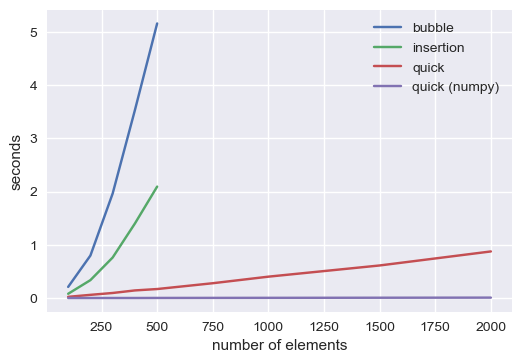

In [35]:
# a. settings
n_vec = np.array([100,200,300,400,500,750,1000,1500,2000,4000,8000,16000]) # number of elements in list
K = 50 # number of repetitions when timing

# b. allocate vectors for results
bubble = np.empty(len(n_vec))
insertion = np.empty(len(n_vec))
quick = np.empty(len(n_vec))
quicknp = np.empty(len(n_vec))

# c. run time trials
np.random.seed(1999)
for i,n in enumerate(n_vec):
    
    # i. draw K random lists of lenght n
    L_bubble = []
    L_insertion = []
    L_quick = []
    L_quicknp = []
    for k in range(K):
        L = np.random.uniform(size=n)
        np.random.shuffle(L)
        L_bubble.append(L.copy())
        L_insertion.append(L.copy())
        L_quick.append(L.copy())
        L_quicknp.append(L.copy())
        
    # ii. bubble sort
    if n <= 500:
        t0 = time.time() # start timer
        for k in range(K):
            bubble_sort(L_bubble[k])
        bubble[i] = time.time()-t0 # calculate time since start
    else: 
        bubble[i] = np.nan
        
    # ii. insertion sort
    if n <= 500:
        t0 = time.time()
        for k in range(K):
            insertion_sort(L_insertion[k])
        insertion[i] = time.time()-t0
    else: 
        insertion[i] = np.nan
        
    # iii. quicksort
    if n <= 2000:
        t0 = time.time()
        for k in range(K):
            quick_sort(L_quick[k])
        quick[i] = time.time()-t0
    else: 
        quick[i] = np.nan
        
    # iii. quicksort (numpy implementation)    
    t0 = time.time()
    for k in range(K):
        L_quicknp[k].sort() # built-in numpy method
    quicknp[i] = time.time()-t0
    
    # iv. check that all sorted lists are the same
    for k in range(K):
        if n <= 500:
            assert np.all(L_bubble[k] == L_quick[k])
            assert np.all(L_insertion[k] == L_quick[k])
        if n <= 2000:
            assert np.all(L_quicknp[k] == L_quick[k])
    
# d. figure    
I = n_vec <= 2000
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(n_vec[I],bubble[I],label='bubble')
ax.plot(n_vec[I],insertion[I],label='insertion')
ax.plot(n_vec[I],quick[I],label='quick')
ax.plot(n_vec[I],quicknp[I],label='quick (numpy)')
ax.set_xlabel('number of elements')
ax.set_ylabel('seconds')
ax.legend();

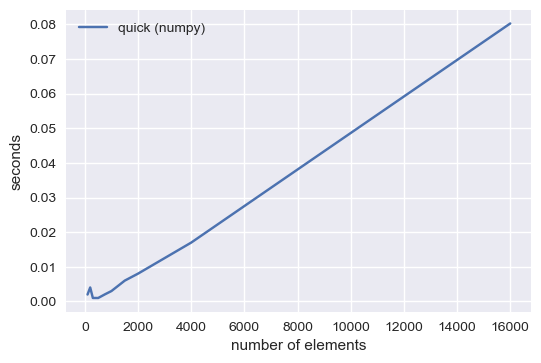

In [34]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(n_vec,quicknp,label='quick (numpy)')
ax.set_xlabel('number of elements')
ax.set_ylabel('seconds')
ax.legend();

**Take-aways:** 

1. Complexity matters
2. Implementation matter (and the built-in functions and methods are hard to beat)

# Summary

**This lecture:**

1. Algorithms and their complexity (big-O notation)
2. Function recursion (functions calling themselves)
3. Searching algorithms (linear, bineary)
4. Sorting algorithm (bubble, insertion, quick)

**Your work:** The problem set is closely related to the algorithms presented here.

**Next lecture:** Solving equations (single vs. system, linear vs. non-linear, numerically vs. symbolically)